In [32]:
## Import packages
import pandas as pd
from pandas import set_option
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import normalize 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error as mse
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import SelectKBest
from sklearn import datasets


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from matplotlib import rcParams
rcParams['xtick.major.pad'] = 1
rcParams['ytick.major.pad'] = 1

## Breast Cancer Wisconsin (Diagnostic) DataSet

# In Brief
In this practice dataset, tumor characteristics of the cell nuclei are derived form digitized image of a fine needle aspirate of a breast mass. 

Ten real-valued features were computed for each cell nucleus: 

* a) radius (mean of distances from center to points on the perimeter) 
* b) texture (standard deviation of gray-scale values) 
* c) perimeter 
* d) area 
* e) smoothness (local variation in radius lengths) 
* f) compactness (perimeter^2 / area - 1.0) 
* g) concavity (severity of concave portions of the contour) 
* h) concave points (number of concave portions of the contour) 
* i) symmetry 
* j) fractal dimension ("coastline approximation" - 1)

Original Dataset is available at the [UCA Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [33]:
# Load dataset from sklearn
bc = datasets.load_breast_cancer()

In [34]:
# For easy of manipulation, convert dataset to pandas dataframe
bcdf = pd.DataFrame(bc.data, columns= bc.feature_names)

In [35]:
# Append dataframe containing tumor features with diagnostic outcomes.
# This labels will be used for supervised learning.
bcdf['Diagnosis'] = bc.target

In [36]:
# Quick glimpse of dataset
bcdf.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [37]:
# Quick glimpse of tumor features in relation to diagnosis
bcdf.groupby('Diagnosis').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
Diagnosis,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [38]:
# For differential diagnosis visual comparisons.
# create to dataframes - one for positive, one for negative

bcdf_n = bcdf[bcdf['Diagnosis'] == 0]
bcdf_y = bcdf[bcdf['Diagnosis'] == 1]

# Create list of features related to mean tumor characteristics
features_means =list(bcdf.columns[0:10])

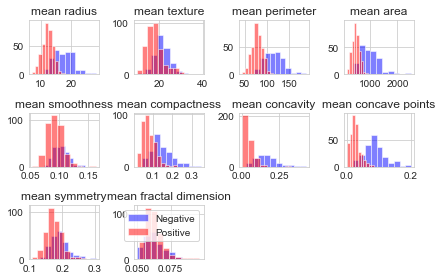

In [39]:
# Visualize tumor characteristics for positive and negatives diagnoses 


# Instantiate figure object
fig = plt.figure()
#plt.sup_title('Tumor Characteristic (means)')

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(bcdf.columns[0:10])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    ax.hist(bcdf_n[b], label = 'Negative', stacked = True, alpha=0.5, color= 'b')
    ax.hist(bcdf_y[b], label= 'Positive', stacked = True, alpha=0.5, color= 'r')
    ax.set_title(b)


sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()   

It looks like mean radius, perimeter, compactness concave points and concavity most clearly segregate between diagnosis. From a descriptive statistics perspective, this could be further evalated by anova with a post-hoc test.

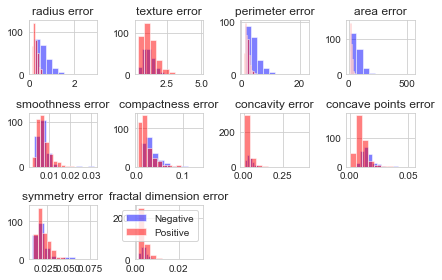

In [40]:

fig = plt.figure()

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(bcdf.columns[10:20])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    ax.hist(bcdf_n[b], label = 'Negative', stacked = True, alpha=0.5, color= 'b')
    ax.hist(bcdf_y[b], label= 'Positive', stacked = True, alpha=0.5, color= 'r')
    ax.set_title(b)


sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()   

In [41]:
bcdf.columns[20:]

Index(['worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'Diagnosis'],
      dtype='object')

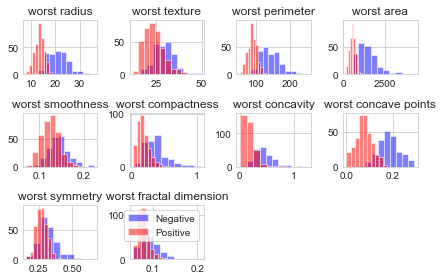

In [42]:

fig = plt.figure()

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(bcdf.columns[20:-1])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    ax.hist(bcdf_n[b], label = 'Negative', stacked = True, alpha=0.5, color= 'b')
    ax.hist(bcdf_y[b], label= 'Positive', stacked = True, alpha=0.5, color= 'r')
    ax.set_title(b)


sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()   

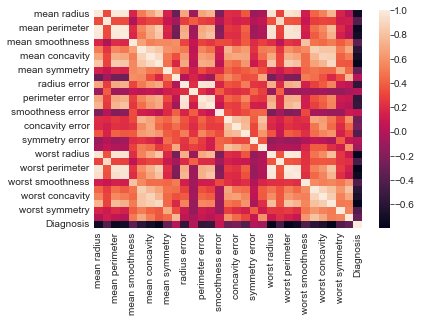

In [43]:
# Quick visualization of relationships between features and diagnoses

sns.heatmap(bcdf.corr())
sns.set_style("whitegrid")
plt.show()

## Data Preprocessing
* Split data into training and test sets
* Normalize data to account for feature scaling

In [44]:
# Split data into testing and training set. Use 80% for training
X_train, X_test, y_train, y_test = train_test_split(bcdf.iloc[:,:-1], bcdf['Diagnosis'], train_size = .8 )

In [45]:
# The normalize features to account for feature scaling

# Instantiate 
norm = Normalizer()

# Fit
norm.fit(X_train)

# Transform both training and testing sets
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

## Model Testing
* We'll start by testing a variety of algorithms using scikit-learns's gridsearch method for model optimization. 
* Our models will include both parametric (e.g. SVM) and non-parametric (e.g. KNN) and linear (e.g. Logistic Regression) and nonlinear modles (e.g. Random Forest Classifier).

In [46]:
# Define parameters for optimization using dictionaries {parameter name: parameter list}

SVM_params = {'C':[0.001, 0.1, 10, 100], 'kernel':['rbf' ,'linear', 'poly', 'sigmoid']}
LR_params = {'C':[0.001, 0.1, 1, 10, 100]}
LDA_params = {'n_components':[None, 1,2,3], 'solver':['svd'], 'shrinkage':[None]}
KNN_params = {'n_neighbors':[1,5,10,20], 'p':[2], 'metric':['minkowski']}
RF_params = {'n_estimators':[10,50,100]}
DTC_params = {'criterion':['entropy'], 'max_depth':[10, 50, 100]}
NB_mult_params = {'alpha':[1,10]}

In [47]:
# Append list of models with parameter dictionaries

models_opt = []

models_opt.append(('LR', LogisticRegression(), LR_params))
models_opt.append(('LDA', LinearDiscriminantAnalysis(), LDA_params))
models_opt.append(('KNN', KNeighborsClassifier(),KNN_params))
models_opt.append(('DTC', DecisionTreeClassifier(), DTC_params))
models_opt.append(('RFC', RandomForestClassifier(), RF_params))
models_opt.append(('SVM', SVC(), SVM_params))
models_opt.append(('NB', MultinomialNB(), NB_mult_params))

In [48]:
# Create global list to collect model CV scores and list of model names (for visualization)
results = []
names = []

# Set the scoring parameter of CV_score to measure model accuracy
scoring = 'accuracy'


# Define a 'for loop' to cycle through list of models and parameter dictionaries
for name, model, params in models_opt:
    
# Use kfolds to break the training data into 5 folds for cross validation
    kfold = KFold(n_splits=5, random_state=2, shuffle=True)
    
# Instantiate gridsearch using the model and parameters (pull from above list of dictionaries)
    model_grid = GridSearchCV(model, params)
    
# Use cross validation method with gridsearch instantiated model, normalized training and 
# testing data, kolds and the scoring parameters
    cv_results = cross_val_score(model_grid, X_train_norm, y_train, cv = kfold, scoring=scoring)

# Append results list with model cv data that includes accuracy scores for 5-fold cross validation 
    results.append(cv_results)

# Append names list - this will help organize model cv performance data with the actaully model name 
    names.append(name)

# Define a string object to list model name, cv accuracy, and cv standard deviation.
    msg = "Cross Validation Accuracy %s: Accarcy: %f SD: %f" % (name, cv_results.mean(), cv_results.std())

# Print message object after completion of 'for loop.'
print(msg)

g:\programs\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "g:\programs\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "g:\programs\anaconda\lib\site-packages\sklearn\discriminant_analysis.py", line 539, in fit
    raise ValueError(
ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

  warnings.warn("Estimator fit failed. The score on this train-test"
g:\programs\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "g:\programs\anaconda\lib\site-packages\sklearn\model_selecti

Cross Validation Accuracy NB: Accarcy: 0.630769 SD: 0.063547


In [49]:
# Guassian Naive Bayes does not require optimization so we will run it separately without
# gridsearch and append the performance results to the results and names lists.

# Instantiate model
GNB =  GaussianNB()

# Define kfold - this was done above but not as a global variable 
kfold = KFold( n_splits=5, random_state=2, shuffle=True)

# Run cross validation
cv_results_GNB= cross_val_score(GNB,X_train_norm, y_train, cv = kfold)

# Append results and names lists
results.append(cv_results_GNB)
names.append('GNB')

In [50]:
# Ensemble Voting

from sklearn.ensemble import VotingClassifier

estimators = []

model1 = LogisticRegression()
estimators.append(("logistic", model1))
model2 = DecisionTreeClassifier()
estimators.append(("cart", model2))
model3 = SVC()
estimators.append(("svm", model3))
model4 = KNeighborsClassifier()
estimators.append(("KNN", model4))
model5 = RandomForestClassifier()
estimators.append(("RFC", model5))
model6 = MultinomialNB()
estimators.append(("NB", model6))
model7 = LinearDiscriminantAnalysis()
estimators.append(("LDA", model7))


voting = VotingClassifier(estimators)


results_voting = cross_val_score(voting, X_train_norm, y_train, cv=kfold)

results.append(results_voting)
names.append('Voting')

print('Accuracy: {} SD: {}'.format(results_voting.mean(), results_voting.std()))

Accuracy: 0.9340659340659341 SD: 0.034750303957894274


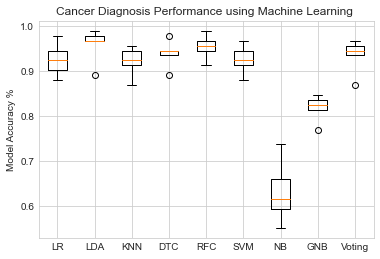

In [51]:
# Visualize model accuracies for comparision - boxplots will be appropriate to visualize 
# data variation

plt.boxplot(results, labels = names)
plt.title('Cancer Diagnosis Performance using Machine Learning ')
plt.ylabel('Model Accuracy %')
sns.set_style("whitegrid")
plt.show()

## Follow-up Model Testing
* It looks like LDA and RFC performed best during cross validation.
* Next, retry these models on test data after training on the entire training set.

### Linear Discriminant Analysis (LDA)

In [52]:
# Instantiate a new LDA model
lda_2 = LinearDiscriminantAnalysis()

# Fit LDA model to the entire training data
lda_2.fit(X_train_norm, y_train)

# Test LDA model on test data
lda_2_predicted = lda_2.predict(X_test_norm)

In [53]:
# Use sklearn's 'accuracy_score' method to check model accuracy during testing
print('Linear discriminant model analyis Accuracy is: {}'.format(accuracy_score(y_test,lda_2_predicted )))

Linear discriminant model analyis Accuracy is: 0.9473684210526315


In [54]:
confusion_matrix_lda = pd.DataFrame(confusion_matrix(y_test, lda_2_predicted), index = ['Actual Negative','Actual Positive'], columns = ['Predicted Negative','Predicted Postive'] )

print('Linear discriminant Model Confusion Matrix')
confusion_matrix_lda

Linear discriminant Model Confusion Matrix


,Predicted Negative,Predicted Postive
Actual Negative,40,4
Actual Positive,2,68


In [55]:
print('Linear discriminant Model Classification Report')
print(classification_report(y_test, lda_2_predicted))

Linear discriminant Model Classification Report
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        44
           1       0.94      0.97      0.96        70

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



### Test Random Forest Classifier

In [56]:
# Parameters
RF_params = {'n_estimators':[10,50,100, 200]}

# Instantiate RFC
RFC_2 = RandomForestClassifier(random_state=42)

# Instantiate gridsearch using RFC model and dictated parameters
RFC_2_grid = GridSearchCV(RFC_2, RF_params)

# Fit model to training data
RFC_2_grid.fit(X_train_norm, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'n_estimators': [10, 50, 100, 200]})

In [57]:
# Check best parameters
RFC_2_grid.best_params_

{'n_estimators': 50}

In [58]:
# Evalaute RFC with test data
RFC_2_predicted = RFC_2_grid.predict(X_test_norm)
accuracy_score(y_test, RFC_2_predicted)

0.9736842105263158

In [59]:
# Train RFC on whole training set

# Instantiate RFC with optimal parameters
RFC_3 = RandomForestClassifier(n_estimators=50, random_state=42)

# Fit RFC to training data
RFC_3.fit(X_train_norm, y_train)

# Predict on training data using fitted RFC
RFC_3_predicted = RFC_3.predict(X_test_norm)

In [60]:
# Quick test of RFC accuracy on testing data
RFC_3_score = accuracy_score(y_test, RFC_3_predicted)
RFC_3_score

0.9736842105263158

In [61]:
# Create dataframe by zipping RFC feature importances and column names
rfc_features = pd.DataFrame(zip(RFC_3.feature_importances_, bcdf.columns[:-1]), columns = ['Importance', 'Features'])

# Sort in descending order for easy organization and visualization
rfc_features = rfc_features.sort_values(['Importance'], ascending=False)

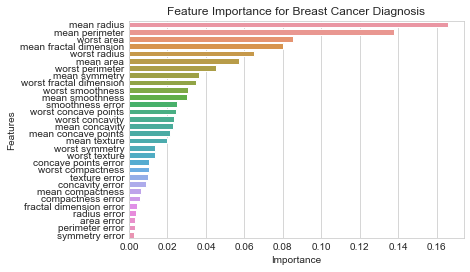

In [62]:
# Visualize RFC feature importances
sns.barplot(x = 'Importance', y = 'Features', data = rfc_features, )
plt.title('Feature Importance for Breast Cancer Diagnosis')
sns.set_style("whitegrid")
plt.show()

### Features Selection with Logistic Regression and Recursive Feature Elimination

In [63]:
# Instantiate new logistic regression for use with scikit-learn's recursive feature elimination...
# with cross validation (RFECV)
lr_2 = LogisticRegression()

# Instantiate RFECV with logistic regression classifier
selector = RFECV(lr_2, cv = 5, scoring='accuracy')

# Fit RFECV to training data
selector.fit(X_train_norm, y_train)

RFECV(cv=5, estimator=LogisticRegression(), scoring='accuracy')

Logistic Regression Model Accuracy with Feature Elimination


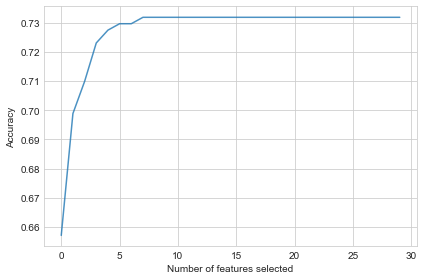

In [64]:
#Plot number of features VS. cross-validation scores

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Accuracy")
plt.plot(selector.grid_scores_, alpha=0.8)
plt.tight_layout()
sns.set_style("whitegrid")

print('Logistic Regression Model Accuracy with Feature Elimination')
plt.show()

In [65]:
# Next, test logistic regression performance using PCA and scikit-learn's pipeline method.

# Create features list to use to instantiate the FeatureUnion
features = []

# Append features list
features.append(('pca', PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=10)))

# Instantiate FeatureUnion object
feature_union = FeatureUnion(features)

# Create pipeline using esimator list, append with feature union and logistic regression
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression()))

# Instantiate model using pipeline method
model_feature_union = Pipeline(estimators)

# Evaluate Pipeline model performance using cross validation
results_feature_union = cross_val_score(model_feature_union, X_train_norm, y_train, cv=kfold)

# Print mean results


Mean accuracy is: 0.8131868131868132


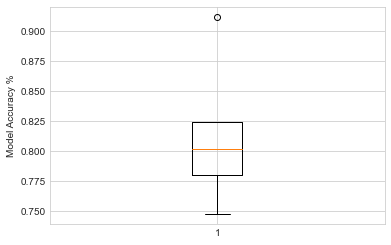

In [66]:
print('Mean accuracy is: {}'.format(results_feature_union.mean()))
plt.boxplot(results_feature_union)
plt.ylabel('Model Accuracy %')
plt.show()

## Dimensional Reduction

Use dimensional reduction to reduce our 30 features into principal components (PCA) that maximally explain the data variance. Other forms of dimensional reduction exist (factor analysis, LDA, etc.), PCA is common approach and worth exploring with this data set.

#### Evaluation of Variance with PCA Component Number

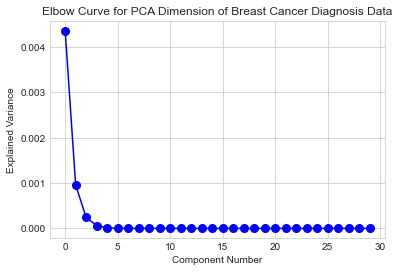

In [67]:
# Instantiate PCA
pca_var = PCA()

# Fit PCA to training data
pca_var.fit(X_train_norm)

# Visualize explained variance with an increasing number of components
plt.plot(pca_var.explained_variance_, 'bo-', markersize=8)
plt.title("Elbow Curve for PCA Dimension of Breast Cancer Diagnosis Data")
plt.ylabel('Explained Variance')
plt.xlabel('Component Number')
sns.set_style("whitegrid")
plt.show()


#### PCA Visualization - 3D visualization

C:\Users\AHMEDS~1\AppData\Local\Temp/ipykernel_12048/1029822469.py:15: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  pca_fig = plt.figure().gca(projection = '3d')


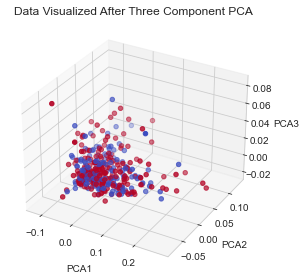

In [68]:
#Instantiate new PCA object
pca = PCA(n_components=3)

# Fit and transform training data with PCA using 3 components
pca.fit(X_train_norm)
X_train_norm_pca = pca.transform(X_train_norm)

# Create a dataframe of 3 PCA
pca_df = pd.DataFrame(X_train_norm_pca, columns = ['PCA1', 'PCA2', 'PCA3'])

# Append diagnosis data into PCA dataframe
pca_df['Diagnosis'] = y_train

# Visualize PCA in a 3D plot - color points by diagnsosis to see if a visuale stratification occurs
pca_fig = plt.figure().gca(projection = '3d')
pca_fig.scatter(pca_df['PCA1'], pca_df['PCA2'], pca_df['PCA3'], c = pca_df['Diagnosis'], cmap=cm.coolwarm)
pca_fig.set_xlabel('PCA1')
pca_fig.set_ylabel('PCA2')
pca_fig.set_zlabel('PCA3')
pca_fig.set_title('Data Visualized After Three Component PCA')

sns.set_style("whitegrid")
plt.tight_layout()
plt.show()